In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
sonar_data = pd.read_csv("sonar_data.csv", header=None)

In [16]:
sonar_data.shape

(208, 61)

In [17]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [18]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


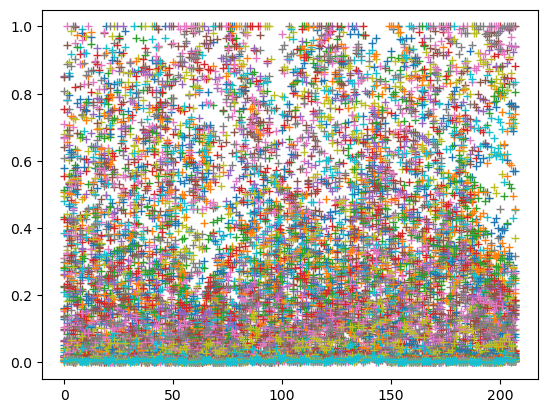

In [9]:
# seperating data and labels
X = sonar_data.drop(columns=60, axis=1)
y = sonar_data[60]

plt.plot(X, "+")
plt.show()

In [64]:
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

plt.plot(X, "+")
plt.show()
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=5)\npca.fit(X)\nX = pca.transform(X)\n\nplt.plot(X, "+")\nplt.show()\n'

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


Model Training

**Logistic Regression**

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print("Accuracy on training data= ", training_data_accuracy)

Accuracy on training data=  0.8373493975903614


In [69]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print("Accuracy on test data= ", test_data_accuracy)

Accuracy on test data=  0.7857142857142857


**Some Prediction**

In [70]:
input_data = np.asarray(sonar_data[30:31].drop(columns=60, axis=1))
input_data = input_data.reshape(1,-1)

prediction = model.predict(input_data)

print(prediction)
answer = sonar_data[30:31][60]
print(answer)

['R']
30    R
Name: 60, dtype: object


**KNN**

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)

In [95]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
# accuracy on training data
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print("Accuracy on training data= ", training_data_accuracy)

Accuracy on training data=  1.0


In [97]:
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8809523809523809
